# Scrapping Amazon Reviews

In [220]:
#importing packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [221]:
#using requests which alows us to send HTTP requests using Python
def get_soup(url):
    url = url
    page =requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup

In [222]:
reviewlist = []
#fetching only data which is necessary like rating title and content given by the customers
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'content': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [223]:
# #creating a loop from 1 to 100 reviews pages of the product
# for x in range(1,100):
#     soup = get_soup(f'https://www.amazon.in/Rockerz-370-Headphone-Bluetooth-Lightweight/product-reviews/B0856HNMR7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
#     print(f'Getting page: {x}')
#     get_reviews(soup)
#     print(len(reviewlist))
#     if not soup.find('li', {'class': 'a-disabled a-last'}):
#         pass
#     else:
#         break
# print('Done')

In [224]:
for x in range(1, 60):
    soup = get_soup(f'https://www.amazon.in/Unix-Folding-Wireless-Bluetooth-Headset/product-reviews/B09J93HFRR/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews={x}')
    print(f'Getting page: {x}')
    get_reviews(soup)
    print(len(reviewlist))
    next_button = soup.find('li', {'class': 'a-disabled a-last'})
    if not next_button:
        pass
    else:
        break

print('Done')



Getting page: 1
0
Getting page: 2
0
Getting page: 3
0
Getting page: 4
0
Getting page: 5
0
Getting page: 6
10
Getting page: 7
10
Getting page: 8
20
Getting page: 9
20
Getting page: 10
30
Getting page: 11
40
Getting page: 12
40
Getting page: 13
40
Getting page: 14
40
Getting page: 15
40
Getting page: 16
40
Getting page: 17
40
Getting page: 18
40
Getting page: 19
40
Getting page: 20
40
Getting page: 21
40
Getting page: 22
50
Getting page: 23
50
Getting page: 24
50
Getting page: 25
50
Getting page: 26
50
Getting page: 27
50
Getting page: 28
50
Getting page: 29
50
Getting page: 30
50
Getting page: 31
50
Getting page: 32
50
Getting page: 33
50
Getting page: 34
60
Getting page: 35
60
Getting page: 36
60
Getting page: 37
70
Getting page: 38
70
Getting page: 39
70
Getting page: 40
70
Getting page: 41
80
Getting page: 42
80
Getting page: 43
80
Getting page: 44
90
Getting page: 45
100
Getting page: 46
110
Getting page: 47
110
Getting page: 48
120
Getting page: 49
130
Getting page: 50
130
Getting 

In [225]:
#creating dataframe of the list
df = pd.DataFrame(reviewlist)
df

,title,rating,content
0,5.0 out of 5 stars\nSuper 😍,5.0,Loved the products 😁
1,1.0 out of 5 stars\nUncomfortable to ears,1.0,Its too small n doesn't fit even though I have...
2,4.0 out of 5 stars\nGood Product,4.0,Pretty good product. For the budget this headp...
3,5.0 out of 5 stars\nBest,5.0,Best
4,5.0 out of 5 stars\nIt's fun in such prize,5.0,Built quality 10/10Sound 8/10Base 8/10It looks...
5,1.0 out of 5 stars\nExperience,1.0,This is very very poor 💩💩💩 head phone for Evry...
6,1.0 out of 5 stars\nWrst product,1.0,The quality ratio of the item is .1 as it look...
7,1.0 out of 5 stars\nVery bad product,1.0,It broke in 2 months don't buy this product
8,1.0 out of 5 stars\nThis headset is not good e...,1.0,"This product is better but not good enough, it..."
9,5.0 out of 5 stars\nBrilliant purchase ❤️,5.0,"Awsom🥰 i love it, 🥰🥰🥰🥰🥰🥰 worth for money👍🏻👍🏻👍🏻..."


In [226]:
df.shape

(140, 3)

In [227]:
df['content'].unique

<bound method Series.unique of 0                                   Loved the products 😁
1      Its too small n doesn't fit even though I have...
2      Pretty good product. For the budget this headp...
3                                                   Best
4      Built quality 10/10Sound 8/10Base 8/10It looks...
5      This is very very poor 💩💩💩 head phone for Evry...
6      The quality ratio of the item is .1 as it look...
7            It broke in 2 months don't buy this product
8      This product is better but not good enough, it...
9      Awsom🥰 i love it, 🥰🥰🥰🥰🥰🥰 worth for money👍🏻👍🏻👍🏻...
10                                  Loved the products 😁
11     Its too small n doesn't fit even though I have...
12     Pretty good product. For the budget this headp...
13                                                  Best
14     Built quality 10/10Sound 8/10Base 8/10It looks...
15     This is very very poor 💩💩💩 head phone for Evry...
16     The quality ratio of the item is .1 as it look...


In [228]:
#combining two columns title and content to make a new column called reviews
df["reviews"] = df["title"]+df["content"]
df.head(11)

,title,rating,content,reviews
0,5.0 out of 5 stars\nSuper 😍,5.0,Loved the products 😁,5.0 out of 5 stars\nSuper 😍Loved the products 😁
1,1.0 out of 5 stars\nUncomfortable to ears,1.0,Its too small n doesn't fit even though I have...,1.0 out of 5 stars\nUncomfortable to earsIts t...
2,4.0 out of 5 stars\nGood Product,4.0,Pretty good product. For the budget this headp...,4.0 out of 5 stars\nGood ProductPretty good pr...
3,5.0 out of 5 stars\nBest,5.0,Best,5.0 out of 5 stars\nBestBest
4,5.0 out of 5 stars\nIt's fun in such prize,5.0,Built quality 10/10Sound 8/10Base 8/10It looks...,5.0 out of 5 stars\nIt's fun in such prizeBuil...
5,1.0 out of 5 stars\nExperience,1.0,This is very very poor 💩💩💩 head phone for Evry...,1.0 out of 5 stars\nExperienceThis is very ver...
6,1.0 out of 5 stars\nWrst product,1.0,The quality ratio of the item is .1 as it look...,1.0 out of 5 stars\nWrst productThe quality ra...
7,1.0 out of 5 stars\nVery bad product,1.0,It broke in 2 months don't buy this product,1.0 out of 5 stars\nVery bad productIt broke i...
8,1.0 out of 5 stars\nThis headset is not good e...,1.0,"This product is better but not good enough, it...",1.0 out of 5 stars\nThis headset is not good e...
9,5.0 out of 5 stars\nBrilliant purchase ❤️,5.0,"Awsom🥰 i love it, 🥰🥰🥰🥰🥰🥰 worth for money👍🏻👍🏻👍🏻...",5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...


In [229]:
#instead of droping the columns we can access the columns we need in further process by iloc
amazon = df.iloc[:,[1,3]]
amazon

,rating,reviews
0,5.0,5.0 out of 5 stars\nSuper 😍Loved the products 😁
1,1.0,1.0 out of 5 stars\nUncomfortable to earsIts t...
2,4.0,4.0 out of 5 stars\nGood ProductPretty good pr...
3,5.0,5.0 out of 5 stars\nBestBest
4,5.0,5.0 out of 5 stars\nIt's fun in such prizeBuil...
5,1.0,1.0 out of 5 stars\nExperienceThis is very ver...
6,1.0,1.0 out of 5 stars\nWrst productThe quality ra...
7,1.0,1.0 out of 5 stars\nVery bad productIt broke i...
8,1.0,1.0 out of 5 stars\nThis headset is not good e...
9,5.0,5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...


In [230]:
#now we have more information in less columns

# Data Preprocessing

Data preprocessing is the process of transforming raw data into an understandable format.

It is also an important step in data mining as we cannot work with raw data.

The quality of the data should be checked before applying machine learning or data mining algorithms

In [231]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   140 non-null    float64
 1   reviews  140 non-null    object 
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [232]:
#checking null values
amazon.isnull().sum()

rating     0
reviews    0
dtype: int64

In [233]:
amazon.describe()

,rating
count,140.000000
mean,2.900000
std,1.927835
min,1.000000
25%,1.000000
50%,2.500000
75%,5.000000
max,5.000000


In [234]:
#counts of every rating
amazon['rating'].value_counts()

1.0    70
5.0    56
4.0    14
Name: rating, dtype: int64

In [235]:
# df_value_counts =pd.DataFrame()
# lst = amazon['rating'].unique()
# dframe = pd.DataFrame(lst)
# nd= amazon['rating'].value_counts()
# dframes= pd.DataFrame(nd)
ratings_count = {'Rating': amazon['rating'].unique(), 'Rating count': amazon['rating'].value_counts()}
rating_count= pd.DataFrame(ratings_count)
rating_count

,Rating,Rating count
1.0,5.0,70
5.0,1.0,56
4.0,4.0,14


# Visualizations for Ratings

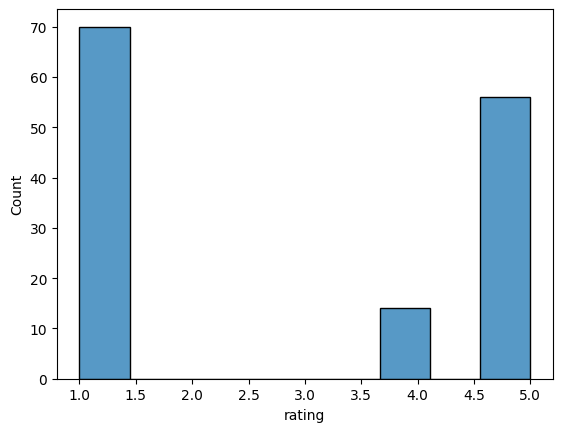

In [236]:
sns.histplot(amazon['rating'])
plt.show()

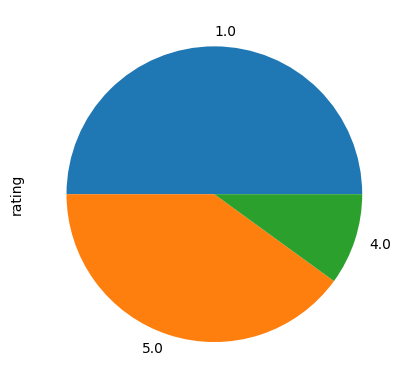

In [237]:
amazon.rating.value_counts().plot(kind='pie')
plt.show()

# Text Preprocessing

In [238]:
#to analyze the data we are a replicating the dataframe as amazon to store more columns but it won't distrub the main dataset
amazon_analysis = amazon.copy()

In [239]:
#Number of characters in single tweet
amazon_analysis['char_count'] = amazon_analysis['reviews'].str.len() ## this also includes spaces
amazon_analysis[['reviews','char_count']]

,reviews,char_count
0,5.0 out of 5 stars\nSuper 😍Loved the products 😁,46
1,1.0 out of 5 stars\nUncomfortable to earsIts t...,149
2,4.0 out of 5 stars\nGood ProductPretty good pr...,95
3,5.0 out of 5 stars\nBestBest,27
4,5.0 out of 5 stars\nIt's fun in such prizeBuil...,127
5,1.0 out of 5 stars\nExperienceThis is very ver...,159
6,1.0 out of 5 stars\nWrst productThe quality ra...,145
7,1.0 out of 5 stars\nVery bad productIt broke i...,78
8,1.0 out of 5 stars\nThis headset is not good e...,213
9,5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...,173


In [240]:
#count of special charaters in the text
amazon_analysis['punctuations'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]')]))
amazon_analysis[['reviews','punctuations']]

,reviews,punctuations
0,5.0 out of 5 stars\nSuper 😍Loved the products 😁,0
1,1.0 out of 5 stars\nUncomfortable to earsIts t...,0
2,4.0 out of 5 stars\nGood ProductPretty good pr...,0
3,5.0 out of 5 stars\nBestBest,0
4,5.0 out of 5 stars\nIt's fun in such prizeBuil...,0
5,1.0 out of 5 stars\nExperienceThis is very ver...,0
6,1.0 out of 5 stars\nWrst productThe quality ra...,0
7,1.0 out of 5 stars\nVery bad productIt broke i...,0
8,1.0 out of 5 stars\nThis headset is not good e...,0
9,5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...,0


In [241]:
#number of numericals present in each row
amazon_analysis['numerics'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
amazon_analysis[['reviews','numerics']]

,reviews,numerics
0,5.0 out of 5 stars\nSuper 😍Loved the products 😁,1
1,1.0 out of 5 stars\nUncomfortable to earsIts t...,1
2,4.0 out of 5 stars\nGood ProductPretty good pr...,1
3,5.0 out of 5 stars\nBestBest,1
4,5.0 out of 5 stars\nIt's fun in such prizeBuil...,1
5,1.0 out of 5 stars\nExperienceThis is very ver...,1
6,1.0 out of 5 stars\nWrst productThe quality ra...,1
7,1.0 out of 5 stars\nVery bad productIt broke i...,2
8,1.0 out of 5 stars\nThis headset is not good e...,1
9,5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...,1


In [242]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [243]:
from nltk.corpus import stopwords

In [244]:
#number of stopwords in each tweet
stop = stopwords.words('english')

amazon_analysis['stopwords'] = amazon_analysis['reviews'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_analysis[['reviews','stopwords']]

,reviews,stopwords
0,5.0 out of 5 stars\nSuper 😍Loved the products 😁,3
1,1.0 out of 5 stars\nUncomfortable to earsIts t...,10
2,4.0 out of 5 stars\nGood ProductPretty good pr...,5
3,5.0 out of 5 stars\nBestBest,2
4,5.0 out of 5 stars\nIt's fun in such prizeBuil...,7
5,1.0 out of 5 stars\nExperienceThis is very ver...,12
6,1.0 out of 5 stars\nWrst productThe quality ra...,11
7,1.0 out of 5 stars\nVery bad productIt broke i...,5
8,1.0 out of 5 stars\nThis headset is not good e...,23
9,5.0 out of 5 stars\nBrilliant purchase ❤️Awsom...,8


### Removing Stopwords

In [245]:
#removing all the stopwords in the column
stop = stopwords.words('english')
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
amazon['reviews']

<ipython-input-245-c4d734e2072a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


0                    5.0 5 stars Super 😍Loved products 😁
1      1.0 5 stars Uncomfortable earsIts small n fit ...
2      4.0 5 stars Good ProductPretty good product. F...
3                                   5.0 5 stars BestBest
4      5.0 5 stars It's fun prizeBuilt quality 10/10S...
5      1.0 5 stars ExperienceThis poor 💩💩💩 head phone...
6      1.0 5 stars Wrst productThe quality ratio item...
7      1.0 5 stars Very bad productIt broke 2 months ...
8      1.0 5 stars This headset good enough, better f...
9      5.0 5 stars Brilliant purchase ❤️Awsom🥰 love i...
10                   5.0 5 stars Super 😍Loved products 😁
11     1.0 5 stars Uncomfortable earsIts small n fit ...
12     4.0 5 stars Good ProductPretty good product. F...
13                                  5.0 5 stars BestBest
14     5.0 5 stars It's fun prizeBuilt quality 10/10S...
15     1.0 5 stars ExperienceThis poor 💩💩💩 head phone...
16     1.0 5 stars Wrst productThe quality ratio item...
17     1.0 5 stars Very bad pro

In [246]:
amazon['reviews'].isnull().sum()

0

In [247]:
#converting all the upper case and sentence case in lower case
amazon = amazon.apply(lambda x: x.astype(str).str.lower())

In [248]:
#converted in lower case
amazon.head()

,rating,reviews
0,5.0,5.0 5 stars super 😍loved products 😁
1,1.0,1.0 5 stars uncomfortable earsits small n fit ...
2,4.0,4.0 5 stars good productpretty good product. f...
3,5.0,5.0 5 stars bestbest
4,5.0,5.0 5 stars it's fun prizebuilt quality 10/10s...


In [249]:
#rare words counts
freq = pd.Series(' '.join(amazon['reviews']).split()).value_counts()[-10:]
freq

money         14
costvalue     14
low           14
premium       14
8/10it        14
8/10base      14
10/10sound    14
prizebuilt    14
fun           14
❤️❤️❤️❤️❤️    14
dtype: int64

In [250]:
#rare words removal
freq = list(freq.index)
amazon['reviews'] = amazon['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
amazon['reviews'].head()

0                  5.0 5 stars super 😍loved products 😁
1    1.0 5 stars uncomfortable earsits small n fit ...
2    4.0 5 stars good productpretty good product. f...
3                                 5.0 5 stars bestbest
4                       5.0 5 stars it's quality looks
Name: reviews, dtype: object

In [251]:
amazon

,rating,reviews
0,5.0,5.0 5 stars super 😍loved products 😁
1,1.0,1.0 5 stars uncomfortable earsits small n fit ...
2,4.0,4.0 5 stars good productpretty good product. f...
3,5.0,5.0 5 stars bestbest
4,5.0,5.0 5 stars it's quality looks
5,1.0,1.0 5 stars experiencethis poor 💩💩💩 head phone...
6,1.0,1.0 5 stars wrst productthe quality ratio item...
7,1.0,1.0 5 stars very bad productit broke 2 months ...
8,1.0,"1.0 5 stars this headset good enough, better f..."
9,5.0,5.0 5 stars brilliant purchase ❤️awsom🥰 love i...


In [252]:
amazon['reviews'].isnull().sum()

0

In [253]:
import re

In [254]:
#removing all the emojis present in the text
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
amazon['reviews'] = amazon['reviews'].apply(lambda x: remove_emoji(x))


In [255]:
amazon['reviews']

0                      5.0 5 stars super loved products 
1      1.0 5 stars uncomfortable earsits small n fit ...
2      4.0 5 stars good productpretty good product. f...
3                                   5.0 5 stars bestbest
4                         5.0 5 stars it's quality looks
5      1.0 5 stars experiencethis poor  head phone ev...
6      1.0 5 stars wrst productthe quality ratio item...
7      1.0 5 stars very bad productit broke 2 months ...
8      1.0 5 stars this headset good enough, better f...
9      5.0 5 stars brilliant purchase awsom🥰 love it,...
10                     5.0 5 stars super loved products 
11     1.0 5 stars uncomfortable earsits small n fit ...
12     4.0 5 stars good productpretty good product. f...
13                                  5.0 5 stars bestbest
14                        5.0 5 stars it's quality looks
15     1.0 5 stars experiencethis poor  head phone ev...
16     1.0 5 stars wrst productthe quality ratio item...
17     1.0 5 stars very bad pro

In [256]:
# from textblob import TextBlob

In [257]:
# #spelling corrections
# amazon['reviews'] = amazon['reviews'][:5].apply(lambda x: str(TextBlob(x).correct()))
# amazon['reviews']

In [258]:
amazon['reviews'].isnull().sum()

0

### Stemming

In [259]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
amazon['reviews'] [:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                        5.0 5 star super love product
1    1.0 5 star uncomfort earsit small n fit even t...
2    4.0 5 star good productpretti good product. fo...
3                                  5.0 5 star bestbest
4                          5.0 5 star it' qualiti look
Name: reviews, dtype: object

In [260]:
# pip install textblob

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [261]:
from textblob import Word
from textblob import TextBlob

### Lemmatization

In [262]:
amazon['reviews']  = amazon['reviews'] .apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
amazon['reviews'] .head()

0                       5.0 5 star super loved product
1    1.0 5 star uncomfortable earsits small n fit e...
2    4.0 5 star good productpretty good product. fo...
3                                  5.0 5 star bestbest
4                         5.0 5 star it's quality look
Name: reviews, dtype: object

In [263]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### N_gram

In [264]:
#bigrams
TextBlob(amazon['reviews'] [0]).ngrams(2)

[WordList(['5.0', '5']),
 WordList(['5', 'star']),
 WordList(['star', 'super']),
 WordList(['super', 'loved']),
 WordList(['loved', 'product'])]

In [265]:
#trigrams
TextBlob(amazon['reviews'] [0]).ngrams(3)

[WordList(['5.0', '5', 'star']),
 WordList(['5', 'star', 'super']),
 WordList(['star', 'super', 'loved']),
 WordList(['super', 'loved', 'product'])]

# CountVectorizer

In [266]:
from sklearn.feature_extraction.text import CountVectorizer

In [267]:
cv=CountVectorizer()
reviewcv=cv.fit_transform(amazon['reviews'])
print(cv.get_feature_names_out())

['aching' 'activity' 'awsom' 'bad' 'bestbest' 'better' 'brilliant' 'broke'
 'budget' 'buy' 'can' 'candy' 'don' 'ear' 'ears' 'earsits' 'enough' 'even'
 'evrything' 'experiencethis' 'fit' 'flexible' 'for' 'gaming' 'good'
 'head' 'headphone' 'headset' 'it' 'item' 'like' 'listen' 'listening'
 'look' 'love' 'loved' 'melt' 'money' 'month' 'movie' 'music' 'perfect'
 'phone' 'poor' 'product' 'productit' 'productpretty' 'productthe'
 'purchase' 'quality' 'ratio' 'road' 'shop' 'side' 'small' 'sound' 'star'
 'started' 'super' 'superr' 'this' 'though' 'tight' 'toy' 'uncomfortable'
 'use' 'very' 'watching' 'worth' 'wrst']


In [268]:
cv = CountVectorizer()

reviewcv = cv.fit_transform(amazon['reviews'] )
sum_words = reviewcv.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['words', 'count']


pd.options.display.max_rows=None
wf_df

,words,count
0,star,140
1,product,70
2,good,56
3,quality,42
4,like,42
5,uncomfortable,28
6,small,28
7,head,28
8,it,28
9,look,28


### CountVectorizer with Bi-gram & Tri-gram

Bi-gram

In [269]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [270]:
top2_words = get_top_n2_words(amazon['reviews'], n=5000)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df

,Bi-gram,Freq
0,buy product,28
1,good enough,28
2,star super,14
3,super loved,14
4,loved product,14
5,star uncomfortable,14
6,uncomfortable earsits,14
7,earsits small,14
8,small fit,14
9,fit even,14


<ipython-input-271-c468de73ffc8>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])


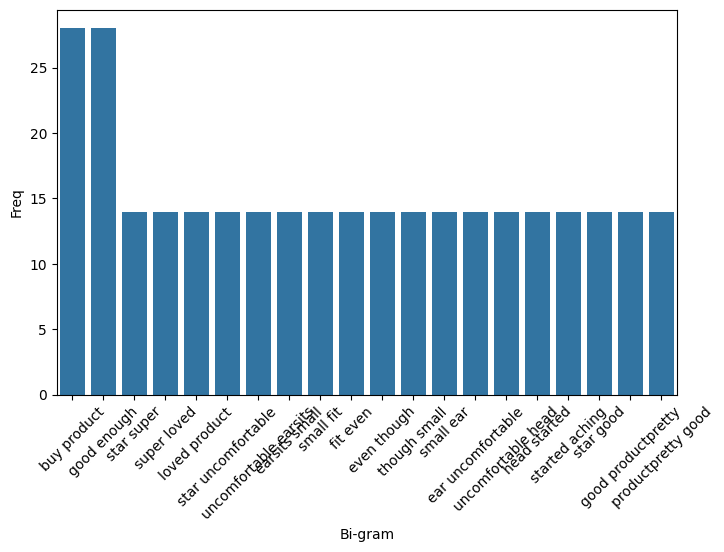

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 5)) #figure size of the visualization
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

Tri-gram

In [272]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],
                reverse=True)
    return words_freq[:n]

In [273]:
top3_words = get_top_n3_words(amazon['reviews'] , n=5000)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

top3_df

,Tri-gram,Freq
0,star super loved,14
1,super loved product,14
2,star uncomfortable earsits,14
3,uncomfortable earsits small,14
4,earsits small fit,14
5,small fit even,14
6,fit even though,14
7,even though small,14
8,though small ear,14
9,small ear uncomfortable,14


<ipython-input-274-46fdb6dfcf1c>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])


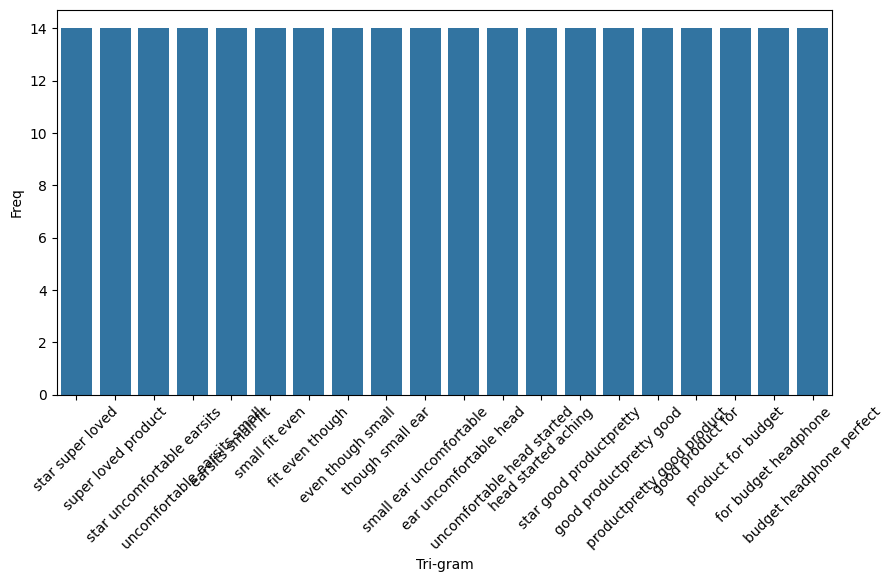

In [274]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])
plt.show()

# Named Entity Recognition (NER)

In [275]:
import string
import re #regular expression
import spacy

In [276]:
nlp = spacy.load("en_core_web_sm")

one_block = str(amazon['reviews'])
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [277]:
#nouns and verbs in the text
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['star', 'loved', 'product', 'star', 'earsits', 'n', 'e', 'star', 'product', 'star', 'star', 'quality', 'look', 'star', 'head', 'phone', 'evry', 'star', 'wrst', 'quality', 'ratio', 'item', 'star', 'productit', 'broke', 'month', 'bu', 'star', 'headset', 'star', 'purchase', 'awsom', 'love', 'star', 'loved', 'product', 'star', 'earsits', 'n', 'e', 'star', 'product', 'star', 'star', 'quality', 'look', 'star', 'head', 'phone', 'evry', 'star', 'wrst', 'quality', 'ratio', 'item', 'star', 'productit', 'broke', 'month', 'bu', 'star', 'headset', 'star', 'purchase', 'awsom', 'love', 'star', 'loved', 'product', 'star', 'earsits', 'n', 'e', 'star', 'product', 'star', 'star', 'quality', 'look', 'star', 'head', 'phone', 'evry', 'star', 'wrst', 'quality', 'ratio', 'item', 'star', 'productit', 'broke', 'month', 'bu', 'star', 'headset', 'star', 'purchase', 'awsom', 'love', 'star', 'loved', 'product', 'star', 'earsits', 'n', 'e', 'star', 'product', 'star', 'star', 'quality', 'look', 'star', 'head', 'phon

In [278]:

len(nouns_verbs)

463

In [279]:
#Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
#with collected nouns and verbs
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['words','count']
wd_df

,words,count
0,star,140
1,product,28
2,quality,28
3,loved,14
4,earsits,14
5,look,14
6,head,14
7,phone,14
8,evry,14
9,wrst,14


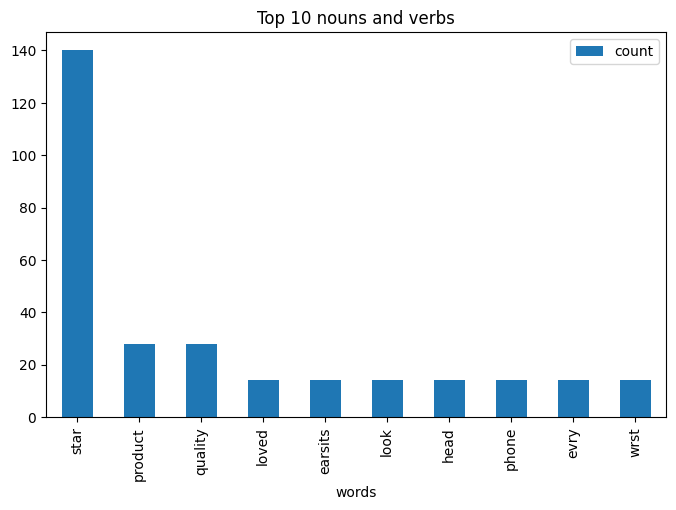

In [280]:
# Visualizing results (Barchart for top 10[nouns + verbs])

wd_df[0:10].plot.bar(x='words',figsize=(8,5),title='Top 10 nouns and verbs');
plt.show()

# Word Cloud

In [281]:
from PIL import Image

<Figure size 640x480 with 0 Axes>

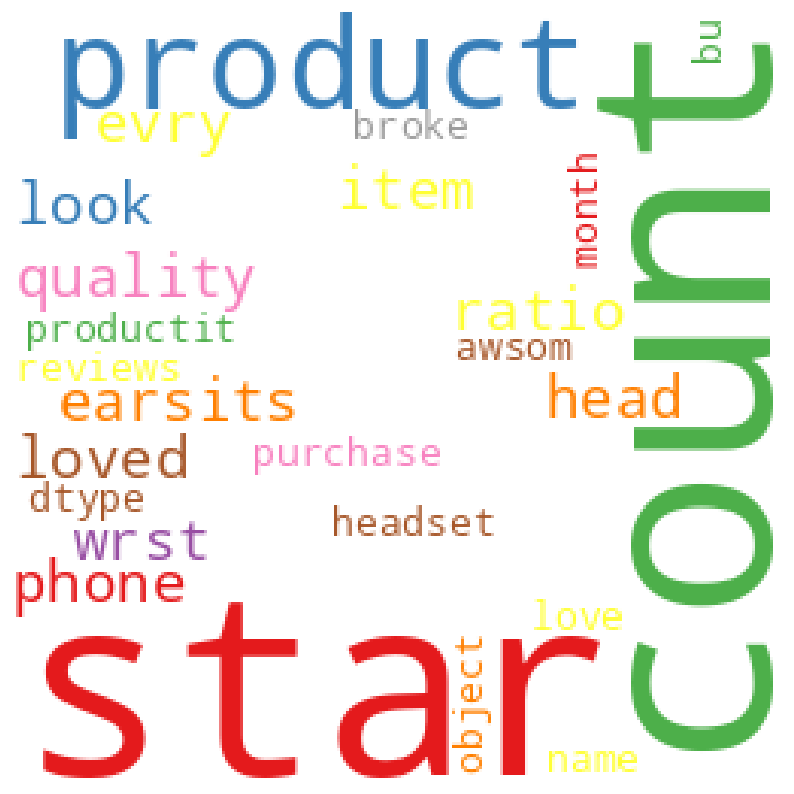

In [282]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10,20))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('words')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
mask = np.array(Image.open("/content/amazon-icon-6.png"))
wordcloud = WordCloud(width=100000,height=100,background_color='white',max_words=500,
                   colormap='Set1', mask=mask, stopwords=STOPWORDS).generate(str(wd_df))
plt.savefig("amazon.png", format="png")
plot_cloud(wordcloud)
plt.show()

In [283]:
# from google.colab import drive
# drive.mount('/content/drive')

## Sentiment Analysis for each word

In [284]:
#sentiment
wd_df['words'][:5].apply(lambda x: TextBlob(x).sentiment)
wd_df['sentiment'] = wd_df['words'].apply(lambda x: TextBlob(x).sentiment[0] )
wd_df[['words','sentiment']]

,words,sentiment
0,star,0.0
1,product,0.0
2,quality,0.0
3,loved,0.7
4,earsits,0.0
5,look,0.0
6,head,0.0
7,phone,0.0
8,evry,0.0
9,wrst,0.0


In [285]:
#  subjectivity and polarity
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

wd_df['Subjectivity'] = wd_df['words'].apply(getSubjectivity)
wd_df['Polarity'] = wd_df['words'].apply(getPolarity)


In [286]:
wd_df

,words,count,sentiment,Subjectivity,Polarity
0,star,140,0.0,0.0,0.0
1,product,28,0.0,0.0,0.0
2,quality,28,0.0,0.0,0.0
3,loved,14,0.7,0.8,0.7
4,earsits,14,0.0,0.0,0.0
5,look,14,0.0,0.0,0.0
6,head,14,0.0,0.0,0.0
7,phone,14,0.0,0.0,0.0
8,evry,14,0.0,0.0,0.0
9,wrst,14,0.0,0.0,0.0


In [287]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


wd_df['Analysis'] = wd_df['Polarity'].apply(getAnalysis)

In [288]:
wd_df

,words,count,sentiment,Subjectivity,Polarity,Analysis
0,star,140,0.0,0.0,0.0,Neutral
1,product,28,0.0,0.0,0.0,Neutral
2,quality,28,0.0,0.0,0.0,Neutral
3,loved,14,0.7,0.8,0.7,Positive
4,earsits,14,0.0,0.0,0.0,Neutral
5,look,14,0.0,0.0,0.0,Neutral
6,head,14,0.0,0.0,0.0,Neutral
7,phone,14,0.0,0.0,0.0,Neutral
8,evry,14,0.0,0.0,0.0,Neutral
9,wrst,14,0.0,0.0,0.0,Neutral


In [289]:
wd_df['Analysis'].count

<bound method Series.count of 0      Neutral
1      Neutral
2      Neutral
3     Positive
4      Neutral
5      Neutral
6      Neutral
7      Neutral
8      Neutral
9      Neutral
10     Neutral
11     Neutral
12     Neutral
13     Neutral
14     Neutral
15     Neutral
16     Neutral
17     Neutral
18    Positive
19     Neutral
20     Neutral
21     Neutral
22     Neutral
23     Neutral
Name: Analysis, dtype: object>

<Axes: >

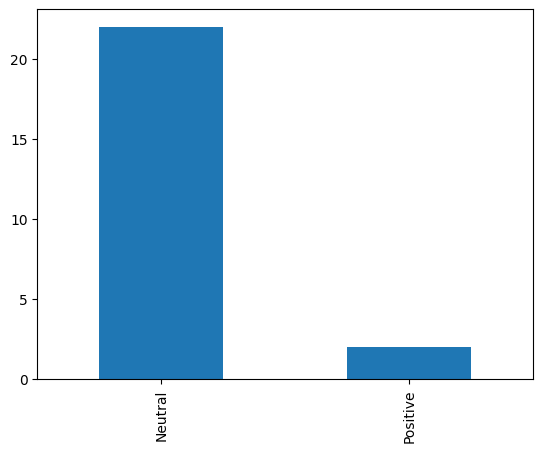

In [290]:
wd_df['Analysis'].value_counts().plot(kind='bar')

# Sentiment Analysis for each review

In [291]:
amazon['reviews'][:5].apply(lambda x: TextBlob(x).sentiment)


0      (0.5166666666666666, 0.7333333333333334)
1    (-0.22000000000000003, 0.6399999999999999)
2      (0.7999999999999999, 0.7333333333333334)
3                                    (0.0, 0.0)
4                                    (0.0, 0.0)
Name: reviews, dtype: object

In [292]:
amazon['sentiment'] = amazon['reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
amazon[['reviews','sentiment']]

,reviews,sentiment
0,5.0 5 star super loved product,0.516667
1,1.0 5 star uncomfortable earsits small n fit e...,-0.220000
2,4.0 5 star good productpretty good product. fo...,0.800000
3,5.0 5 star bestbest,0.000000
4,5.0 5 star it's quality look,0.000000
5,1.0 5 star experiencethis poor head phone evry...,-0.400000
6,1.0 5 star wrst productthe quality ratio item ...,0.000000
7,1.0 5 star very bad productit broke 2 month bu...,-0.910000
8,"1.0 5 star this headset good enough, better fl...",0.293033
9,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000


## Subjectivity and Polarity

In [293]:
from textblob import TextBlob
def getSubjectivity(clean_review):
    return TextBlob(clean_review).sentiment.subjectivity

def getPolarity(clean_review):
    return TextBlob(clean_review).sentiment.polarity

amazon['Subjectivity'] = amazon['reviews'].apply(getSubjectivity)
amazon['Polarity'] = amazon['reviews'].apply(getPolarity)


In [294]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity
0,5.0,5.0 5 star super loved product,0.516667,0.733333,0.516667
1,1.0,1.0 5 star uncomfortable earsits small n fit e...,-0.220000,0.640000,-0.220000
2,4.0,4.0 5 star good productpretty good product. fo...,0.800000,0.733333,0.800000
3,5.0,5.0 5 star bestbest,0.000000,0.000000,0.000000
4,5.0,5.0 5 star it's quality look,0.000000,0.000000,0.000000
5,1.0,1.0 5 star experiencethis poor head phone evry...,-0.400000,0.600000,-0.400000
6,1.0,1.0 5 star wrst productthe quality ratio item ...,0.000000,0.000000,0.000000
7,1.0,1.0 5 star very bad productit broke 2 month bu...,-0.910000,0.866667,-0.910000
8,1.0,"1.0 5 star this headset good enough, better fl...",0.293033,0.497959,0.293033
9,5.0,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000,0.525000,0.525000


In [295]:
# function to analyze the reviews
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


amazon['Analysis'] = amazon['Polarity'].apply(getAnalysis)

In [296]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis
0,5.0,5.0 5 star super loved product,0.516667,0.733333,0.516667,Positive
1,1.0,1.0 5 star uncomfortable earsits small n fit e...,-0.220000,0.640000,-0.220000,Negative
2,4.0,4.0 5 star good productpretty good product. fo...,0.800000,0.733333,0.800000,Positive
3,5.0,5.0 5 star bestbest,0.000000,0.000000,0.000000,Neutral
4,5.0,5.0 5 star it's quality look,0.000000,0.000000,0.000000,Neutral
5,1.0,1.0 5 star experiencethis poor head phone evry...,-0.400000,0.600000,-0.400000,Negative
6,1.0,1.0 5 star wrst productthe quality ratio item ...,0.000000,0.000000,0.000000,Neutral
7,1.0,1.0 5 star very bad productit broke 2 month bu...,-0.910000,0.866667,-0.910000,Negative
8,1.0,"1.0 5 star this headset good enough, better fl...",0.293033,0.497959,0.293033,Positive
9,5.0,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000,0.525000,0.525000,Positive


<Axes: >

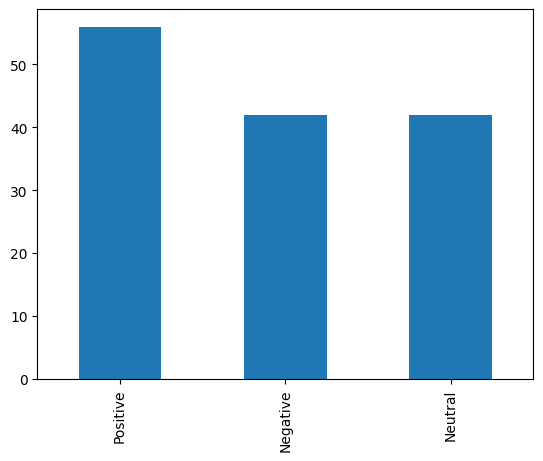

In [297]:
amazon['Analysis'].value_counts().plot(kind='bar')

In [298]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis
0,5.0,5.0 5 star super loved product,0.516667,0.733333,0.516667,Positive
1,1.0,1.0 5 star uncomfortable earsits small n fit e...,-0.220000,0.640000,-0.220000,Negative
2,4.0,4.0 5 star good productpretty good product. fo...,0.800000,0.733333,0.800000,Positive
3,5.0,5.0 5 star bestbest,0.000000,0.000000,0.000000,Neutral
4,5.0,5.0 5 star it's quality look,0.000000,0.000000,0.000000,Neutral
5,1.0,1.0 5 star experiencethis poor head phone evry...,-0.400000,0.600000,-0.400000,Negative
6,1.0,1.0 5 star wrst productthe quality ratio item ...,0.000000,0.000000,0.000000,Neutral
7,1.0,1.0 5 star very bad productit broke 2 month bu...,-0.910000,0.866667,-0.910000,Negative
8,1.0,"1.0 5 star this headset good enough, better fl...",0.293033,0.497959,0.293033,Positive
9,5.0,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000,0.525000,0.525000,Positive


## Generate Positive Reviews Word Cloud

In [299]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,max_words=300,background_color='black')

In [300]:
Positive = wc.generate(amazon[amazon['Polarity']>0]['reviews'].str.cat(sep=""))

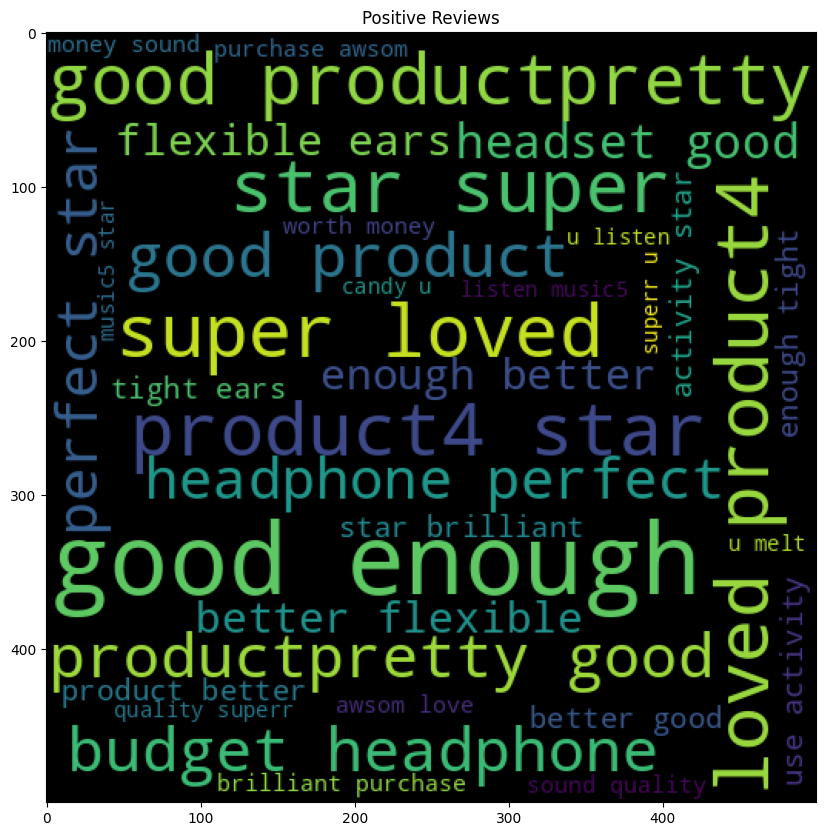

In [301]:
plt.figure(figsize=(10,10))
plt.imshow(Positive)
plt.title('Positive Reviews')
plt.show()

## Generate Negative Reviews Word Cloud

In [302]:
Negative=wc.generate(amazon[amazon['Polarity']<0]['reviews'].str.cat(sep=""))

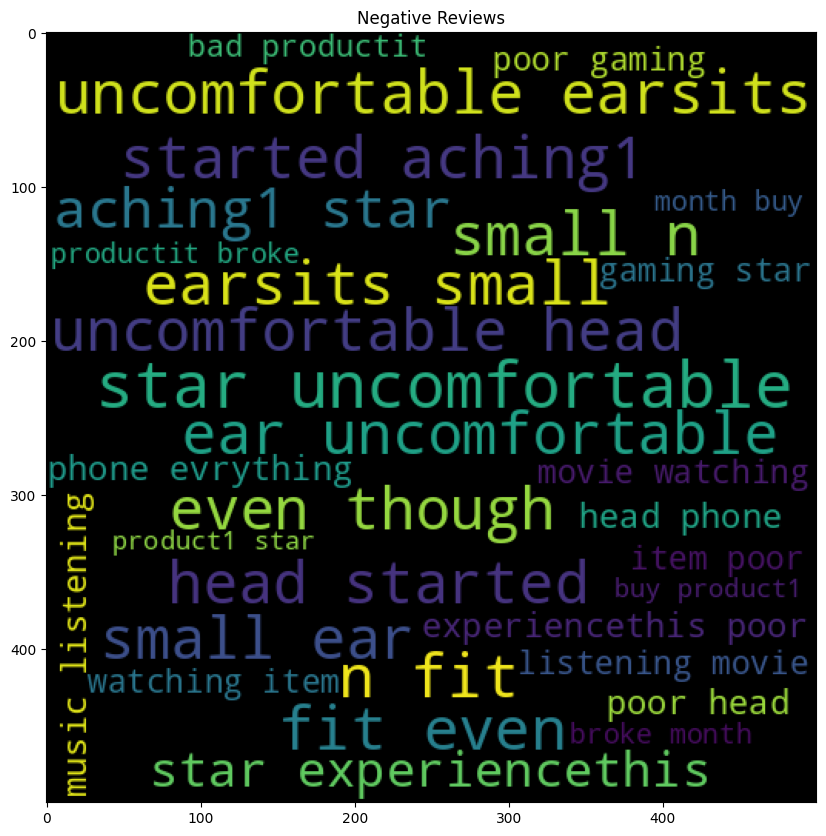

In [303]:
plt.figure(figsize=(10,10))
plt.imshow(Negative)
plt.title('Negative Reviews')
plt.show()

## Generate Neutral Reviews Word Cloud

In [304]:
Neutral = wc.generate(amazon[amazon['Polarity']==0]['reviews'].str.cat(sep=""))

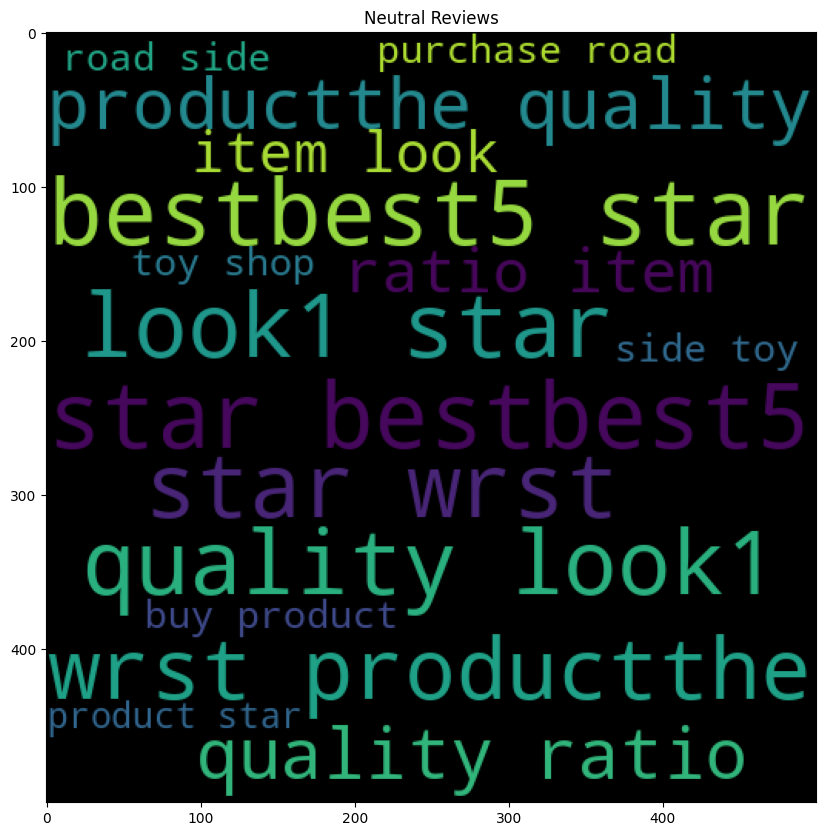

In [305]:
plt.figure(figsize=(10,10))
plt.imshow(Neutral)
plt.title('Neutral Reviews')
plt.show()

# Model Building

In [306]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
vectorizer=TfidfVectorizer(max_features=10000)

In [307]:
x=vectorizer.fit_transform(amazon['reviews'])

In [308]:
#rows, reviews
x.shape

(140, 70)

### LabelEncoder for classification Model

In [309]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [310]:
amazon['target']=encoder.fit_transform(amazon['Analysis'])
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis,target
0,5.0,5.0 5 star super loved product,0.516667,0.733333,0.516667,Positive,2
1,1.0,1.0 5 star uncomfortable earsits small n fit e...,-0.220000,0.640000,-0.220000,Negative,0
2,4.0,4.0 5 star good productpretty good product. fo...,0.800000,0.733333,0.800000,Positive,2
3,5.0,5.0 5 star bestbest,0.000000,0.000000,0.000000,Neutral,1
4,5.0,5.0 5 star it's quality look,0.000000,0.000000,0.000000,Neutral,1
5,1.0,1.0 5 star experiencethis poor head phone evry...,-0.400000,0.600000,-0.400000,Negative,0
6,1.0,1.0 5 star wrst productthe quality ratio item ...,0.000000,0.000000,0.000000,Neutral,1
7,1.0,1.0 5 star very bad productit broke 2 month bu...,-0.910000,0.866667,-0.910000,Negative,0
8,1.0,"1.0 5 star this headset good enough, better fl...",0.293033,0.497959,0.293033,Positive,2
9,5.0,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000,0.525000,0.525000,Positive,2


In [311]:
y_svc=amazon['target'].values
y_svc

array([2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0,
       2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0,
       2, 1, 1, 0, 1, 0, 2, 2])

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
X_train,X_test,y_train,y_test=train_test_split(x,y_svc,test_size=0.1,random_state=40)

# SVC

In [314]:
from sklearn.svm import SVC
from sklearn import svm

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [315]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[25,20,10,1,0.5],'C':[20,15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [20, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [25, 20, 10, 1, 0.5], 'kernel': ['rbf']}])

In [316]:
gsv.best_params_ , gsv.best_score_

({'C': 20, 'gamma': 25, 'kernel': 'rbf'}, 1.0)

In [317]:
clf = SVC(C= 20, gamma = 25)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 100.0


array([[6, 0, 0],
       [0, 3, 0],
       [0, 0, 5]])

# KNN

In [318]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [319]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [320]:
print(grid_search.best_params_)

{'n_neighbors': 1}


In [321]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 100.00%


In [322]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

In [323]:
#Train the model using the training sets
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [324]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [325]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)


Accuracy: 100.0


# Bagging Boosting

In [326]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result.
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import classification_report, confusion_matrix

In [327]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object
dcmodel =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6), random_state=0) #decision tree classifier object

In [328]:
dcmodel = dcmodel.fit(X_train,y_train) #train decision tree
y_predict = dcmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [329]:
print("Accuracy : ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  100.0


# Random Forest

In [330]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [331]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [332]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# # Load iris dataset as an example
# data = load_iris()
# X = data.data
# y = data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model
# rf.fit(X_train, y_train)

# # Access feature importances
# feature_importances = rf.feature_importances_

# # Print the number of features and their importances
# print("Number of features:", len(feature_importances))
# print("Feature importances:", feature_importances)


In [333]:
pip install --upgrade scikit-learn


In [334]:
rf.fit(X_train,y_train) # Fitting RandomForestClassifier model from sklearn.ensemble
rf.estimators_ #
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels
rf.n_features_in_ # Number of input features in model 8 here.

rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_

1.0

In [335]:
rf.predict(X_test)

array([0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2])

In [336]:
preds = rf.predict(X_test)
pd.Series(preds).value_counts()

0    6
2    5
1    3
dtype: int64

In [337]:
preds

array([0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2])

In [338]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data

crosstable = pd.crosstab(y_test,preds)
crosstable

col_0,0,1,2
row_0,,,
0,6,0,0
1,0,3,0
2,0,0,5


In [339]:
# Final step we will calculate the accuracy of our model

# We are comparing the predicted values with the actual values and calculating mean for the matches
np.mean(preds==y_test)

1.0

In [340]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



# XGBoost (Extreme Gradient Boosting)

In [341]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [342]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [343]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [344]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [345]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


### XGBoost giving the best result, we can use it for deployment

In [346]:
amazon

,rating,reviews,sentiment,Subjectivity,Polarity,Analysis,target
0,5.0,5.0 5 star super loved product,0.516667,0.733333,0.516667,Positive,2
1,1.0,1.0 5 star uncomfortable earsits small n fit e...,-0.220000,0.640000,-0.220000,Negative,0
2,4.0,4.0 5 star good productpretty good product. fo...,0.800000,0.733333,0.800000,Positive,2
3,5.0,5.0 5 star bestbest,0.000000,0.000000,0.000000,Neutral,1
4,5.0,5.0 5 star it's quality look,0.000000,0.000000,0.000000,Neutral,1
5,1.0,1.0 5 star experiencethis poor head phone evry...,-0.400000,0.600000,-0.400000,Negative,0
6,1.0,1.0 5 star wrst productthe quality ratio item ...,0.000000,0.000000,0.000000,Neutral,1
7,1.0,1.0 5 star very bad productit broke 2 month bu...,-0.910000,0.866667,-0.910000,Negative,0
8,1.0,"1.0 5 star this headset good enough, better fl...",0.293033,0.497959,0.293033,Positive,2
9,5.0,"5.0 5 star brilliant purchase awsom🥰 love it, ...",0.525000,0.525000,0.525000,Positive,2


In [347]:
import pickle

In [348]:
#downloading pkl file in write binary format
pickle.dump(amazon,open('amazon_pkl.pkl','wb'))

In [350]:
amazon.to_csv(r'amazon_final.csv', index=False)